## **13. Code: DFS**


### **Traverse a tree (depth first search)**


Traversing a tree means "visiting" all the nodes in the tree once. Unlike an array or linked list, there's more than one way to walk through a tree, starting from the root node.



Traversing a tree is helpful for printing out all the values stored in the tree, as well as searching for a value in a tree, inserting into or deleting values from the tree. There's depth first search and breadth first search.



Depth first search has 3 types: pre-order, in-order, and post-order.



Let's walk through pre-order traversal by hand first, and then try it out in code.



### **Creating a sample tree**


We'll create a tree that looks like the following:



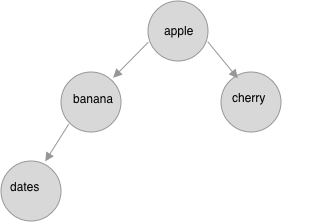

In [1]:

# this code makes the tree that we'll traverse

class Node(object):

    def __init__(self, value=None):
        self.value = value
        self.left = None
        self.right = None

    def set_value(self, value):
        self.value = value

    def get_value(self):
        return self.value

    def set_left_child(self, left):
        self.left = left

    def set_right_child(self, right):
        self.right = right

    def get_left_child(self):
        return self.left

    def get_right_child(self):
        return self.right

    def has_left_child(self):
        return self.left != None

    def has_right_child(self):
        return self.right != None

    # define __repr_ to decide what a print statement displays for a Node object
    def __repr__(self):
        return f"Node({self.get_value()})"

    def __str__(self):
        return f"Node({self.get_value()})"


class Tree():
    def __init__(self, value=None):
        self.root = Node(value)

    def get_root(self):
        return self.root


In [2]:
# create a tree and add some nodes
tree = Tree("apple")
tree.get_root().set_left_child(Node("banana"))
tree.get_root().set_right_child(Node("cherry"))
tree.get_root().get_left_child().set_left_child(Node("dates"))


### **Depth first, pre-order traversal with a stack**


pre-order traversal of the tree would visit the nodes in this order:



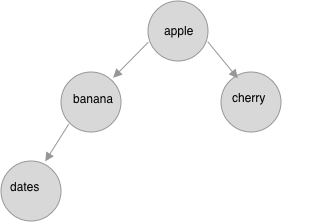

apple, banana, dates, cherry



**Stack**

Notice how we're retracing our steps. It's like we are hiking on a trail, and trying to retrace our steps on the way back. This is an indication that we should use a stack.



In [3]:
# Let's define a stack to help keep track of the tree nodes
class Stack():
    def __init__(self):
        self.list = list()

    def push(self, value):
        self.list.append(value)

    def pop(self):
        return self.list.pop()

    def top(self):
        if len(self.list) > 0:
            return self.list[-1]
        else:
            return None

    def is_empty(self):
        return len(self.list) == 0

    def __repr__(self):
        if len(self.list) > 0:
            s = "<top of stack>\n_________________\n"
            s += "\n_________________\n".join([str(item)
                                              for item in self.list[::-1]])
            s += "\n_________________\n<bottom of stack>"
            return s

        else:
            return "<stack is empty>"


In [4]:
# check Stack
stack = Stack()
stack.push("apple")
stack.push("banana")
stack.push("cherry")
stack.push("dates")
print(stack.pop())
print("\n")
print(stack)

dates


<top of stack>
_________________
cherry
_________________
banana
_________________
apple
_________________
<bottom of stack>


### **Walk through the steps with code**


We're going to translate what we're doing by hand into code, one step at a time. This will help us check if our code is doing what we expect it to do.



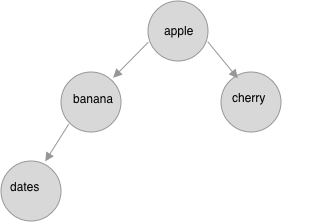

In [5]:
visit_order = list()
stack = Stack()

# start at the root node, visit it and then add it to the stack
node = tree.get_root()
stack.push(node)

print(f"""
visit_order {visit_order} 
stack:
{stack}
""")


visit_order [] 
stack:
<top of stack>
_________________
Node(apple)
_________________
<bottom of stack>



In [6]:
# visit apple
visit_order.append(node.get_value())
print(f"""visit order {visit_order}
{stack}
""")

visit order ['apple']
<top of stack>
_________________
Node(apple)
_________________
<bottom of stack>



In [7]:
# check if apple has a left child
print(f"{node} has left child? {node.has_left_child()}")

# since apple has a left child (banana)
# we'll visit banana and add it to the stack
if node.has_left_child():
    node = node.get_left_child()
    stack.push(node)

print(f"""
visit_order {visit_order} 
stack:
{stack}
""")

Node(apple) has left child? True

visit_order ['apple'] 
stack:
<top of stack>
_________________
Node(banana)
_________________
Node(apple)
_________________
<bottom of stack>



In [8]:
# visit banana
print(f"visit {node}")
visit_order.append(node.get_value())
print(f"""visit_order {visit_order}""")

visit Node(banana)
visit_order ['apple', 'banana']


In [9]:
# check if apple has a left child
print(f"{node} has left child? {node.has_left_child()}")

# since apple has a left child (banana)
# we'll visit banana and add it to the stack
if node.has_left_child():
    node = node.get_left_child()
    stack.push(node)

print(f"""
visit_order {visit_order} 
stack:
{stack}
""")

Node(banana) has left child? True

visit_order ['apple', 'banana'] 
stack:
<top of stack>
_________________
Node(dates)
_________________
Node(banana)
_________________
Node(apple)
_________________
<bottom of stack>



In [10]:
# visit dates
visit_order.append(node.get_value())
print(f"visit order {visit_order}")

visit order ['apple', 'banana', 'dates']


In [11]:
# check if "dates" has a left child
print(f"{node} has left child? {node.has_left_child()}")

Node(dates) has left child? False


In [12]:
# since dates doesn't have a left child, we'll check if it has a right child
print(f"{node} has right child? {node.has_right_child()}")

Node(dates) has right child? False


In [13]:
# since "dates" is a leaf node (has no children), we can start to retrace our steps
# in other words, we can pop it off the stack.
print(stack.pop())

Node(dates)


In [14]:
print(stack)


<top of stack>
_________________
Node(banana)
_________________
Node(apple)
_________________
<bottom of stack>


In [15]:
# now we'll set the node to the new top of the stack, which is banana
node = stack.top()
print(node)

Node(banana)


In [16]:
# we already checked for banana's left child, so we'll check for its right child
print(f"{node} has right child? {node.has_right_child()}")

Node(banana) has right child? False


In [17]:
# banana doesn't have a right child, so we're also done tracking it.
# so we can pop banana off the stack
print(f"pop {stack.pop()} off stack")
print(f"""
stack
{stack}
""")

pop Node(banana) off stack

stack
<top of stack>
_________________
Node(apple)
_________________
<bottom of stack>



In [18]:
# now we'll track the new top of the stack, which is apple
node = stack.top()
print(node)

Node(apple)


In [19]:
# we've already checked if apple has a left child; we'll check if it has a right child
print(f"{node} has right child? {node.has_right_child()}")

Node(apple) has right child? True


In [20]:
# since it has a right child (cherry), 
# we'll visit cherry and add it to the stack.
if node.has_right_child():
    node = node.get_right_child()
    stack.push(node)
    
print(f"""
visit_order {visit_order} 
stack
{stack}
""")


visit_order ['apple', 'banana', 'dates'] 
stack
<top of stack>
_________________
Node(cherry)
_________________
Node(apple)
_________________
<bottom of stack>



In [21]:
# visit cherry
print(f"visit {node}")
visit_order.append(node.get_value())
print(f"""visit_order: {visit_order}""")

visit Node(cherry)
visit_order: ['apple', 'banana', 'dates', 'cherry']


In [22]:
# Now we'll check if cherry has a left child
print(f"{node} has left child? {node.has_left_child()}")

# it doesn't, so we'll check if it has a right child
print(f"{node} has right child? {node.has_right_child()}")

Node(cherry) has left child? False
Node(cherry) has right child? False


In [23]:
# since cherry has neither left nor right child nodes,
# we are done tracking it, and can pop it off the stack

print(f"pop {stack.pop()} off the stack")

print(f"""
visit_order {visit_order} 
stack
{stack}
""")

pop Node(cherry) off the stack

visit_order ['apple', 'banana', 'dates', 'cherry'] 
stack
<top of stack>
_________________
Node(apple)
_________________
<bottom of stack>



In [24]:
# now we're back to apple at the top of the stack.
# since we've already checked apple's left and right child nodes,
# we can pop apple off the stack

print(f"pop {stack.pop()} off stack")
print(f"pre-order traversal visited nodes in this order: {visit_order}")

pop Node(apple) off stack
pre-order traversal visited nodes in this order: ['apple', 'banana', 'dates', 'cherry']


In [25]:
print(f"""stack
{stack}""")

stack
<stack is empty>


### **pre-order traversal using a stack (something's missing)**


Here is some code that has an error, so it will have an infinite loop. There is a counter to make the loop stop so that it doesn't run forever.


In [26]:
def pre_order_with_stack_buggy(tree):
    visit_order = list()
    stack = Stack()
    node = tree.get_root()
    stack.push(node)
    node = stack.top()
    visit_order.append(node.get_value())
    count = 0
    loop_limit = 7
    while (node and count < loop_limit):
        print(f""" 
        loop count: {count} 
        current node: {node} 
        stack: {stack}
        """
              )
        count += 1
        if node.has_left_child():
            node = node.get_left_child()
            stack.push(node)
            # using top() is redundant, but added for clarity
            node = stack.top()
            visit_order.append(node.get_value())

        elif node.has_right_child():
            node = node.get_right_child()
            stack.push(node)
            node = stack.top()
            visit_order.append(node.get_value())

        else:
            stack.pop()
            if not stack.is_empty():
                node = stack.top()
            else:
                node = None

    return visit_order


In [27]:
pre_order_with_stack_buggy(tree)


 
        loop count: 0 
        current node: Node(apple) 
        stack: <top of stack>
_________________
Node(apple)
_________________
<bottom of stack>
        
 
        loop count: 1 
        current node: Node(banana) 
        stack: <top of stack>
_________________
Node(banana)
_________________
Node(apple)
_________________
<bottom of stack>
        
 
        loop count: 2 
        current node: Node(dates) 
        stack: <top of stack>
_________________
Node(dates)
_________________
Node(banana)
_________________
Node(apple)
_________________
<bottom of stack>
        
 
        loop count: 3 
        current node: Node(banana) 
        stack: <top of stack>
_________________
Node(banana)
_________________
Node(apple)
_________________
<bottom of stack>
        
 
        loop count: 4 
        current node: Node(dates) 
        stack: <top of stack>
_________________
Node(dates)
_________________
Node(banana)
_________________
Node(apple)
_________________
<bottom of stack

['apple', 'banana', 'dates', 'dates', 'dates']

### **pre-order traversal using a stack, tracking state**


Here's how we implement DFS with a stack, where we also track whether we've already visited the left or right child of the node.



In [30]:
class State(object):
    def __init__(self, node):
        self.node = node
        self.visited_left = False
        self.visited_right = False

    def get_node(self):
        return self.node

    def get_visited_left(self):
        return self.visited_left

    def get_visited_right(self):
        return self.visited_right

    def set_visited_left(self):
        self.visited_left = True

    def set_visited_right(self):
        self.visited_right = True

    def __repr__(self):
        s = f"""
        {self.node}
        visited_left: {self.visited_left}
        visited_right: {self.visited_right}
        """
        return s


In [31]:
def pre_order_with_stack(tree, debug_mode=False):
    visit_order = list()
    stack = Stack()
    node = tree.get_root()
    visit_order.append(node.get_value())
    state = State(node)
    stack.push(state)
    count = 0
    while (node):
        if debug_mode:
            print(f"""
                    loop count: {count}
                    current node: {node}
                    stack:
                    {stack}
                    """
                  )
        count += 1
        if node.has_left_child() and not state.get_visited_left():
            state.set_visited_left()
            node = node.get_left_child()
            visit_order.append(node.get_value())
            state = State(node)
            stack.push(state)

        elif node.has_right_child() and not state.get_visited_right():
            state.set_visited_right()
            node = node.get_right_child()
            visit_order.append(node.get_value())
            state = State(node)

        else:
            stack.pop()
            if not stack.is_empty():
                state = stack.top()
                node = state.get_node()
            else:
                node = None

    if debug_mode:
        print(f"""
loop count: {count}
current node: {node}
stack:
{stack}
            """)
    return visit_order


In [32]:
# check pre-order traversal

pre_order_with_stack(tree, debug_mode=True)


                    loop count: 0
                    current node: Node(apple)
                    stack:
                    <top of stack>
_________________

        Node(apple)
        visited_left: False
        visited_right: False
        
_________________
<bottom of stack>
                    

                    loop count: 1
                    current node: Node(banana)
                    stack:
                    <top of stack>
_________________

        Node(banana)
        visited_left: False
        visited_right: False
        
_________________

        Node(apple)
        visited_left: True
        visited_right: False
        
_________________
<bottom of stack>
                    

                    loop count: 2
                    current node: Node(dates)
                    stack:
                    <top of stack>
_________________

        Node(dates)
        visited_left: False
        visited_right: False
        
_________________

        Node(bana

['apple', 'banana', 'dates', 'cherry']

### **Task 01: pre-order traversal with recursion**


In [33]:
def pre_order(tree):
    visit_order = list()
    root = tree.get_root()
    
    def traverse(node):
        if node:
            # visit the node
            visit_order.append(node.get_value())
            
            # traverse left subtree
            traverse(node.get_left_child())
            
            # traverse right subtree
            traverse(node.get_right_child())
    
    traverse(root)
    
    return visit_order

In [34]:
tree_preorder = pre_order(tree)
print(tree_preorder)

['apple', 'banana', 'dates', 'cherry']


### **Task: do in-order traversal**


We want to traverse the left subtree, then visit the node, and then traverse the right subtree.



`hint`: it's very similar in structure to the pre-order traversal.



In [35]:
# define in-order traversal
def in_order(tree):
    visit_order = list()
    root = tree.get_root()
    
    def traverse(node):
        if node:
            # traverse left subtree
            traverse(node.get_left_child())
            
            # visit the node
            visit_order.append(node.get_value())
            
            # traverse right subtree
            traverse(node.get_right_child())
    
    traverse(root)
    
    return visit_order

In [36]:
# check solution: should get: ['dates', 'banana', 'apple', 'cherry']
tree_in_order = in_order(tree)
print(tree_in_order)

['dates', 'banana', 'apple', 'cherry']


### **Task: post-order traversal**


Traverse left subtree, then right subtree, and then visit the node.



In [37]:
# define post_order traversal
def post_order(tree):
    visit_order = list()
    root = tree.get_root()
    
    def traverse(node):
        if node:
            # traverse left subtree
            traverse(node.get_left_child())
            
            # traverse right subtree
            traverse(node.get_right_child())
            
            # visit the node
            visit_order.append(node.get_value())
    
    traverse(root)
    
    return visit_order

In [38]:
# check solution: should get: ['dates', 'banana', 'cherry', 'apple']
tree_post_order = post_order(tree)
print(tree_post_order)

['dates', 'banana', 'cherry', 'apple']


### **Solution Notebook**


The solution notebook is [here](02 traverse_a_tree_dfs_solution.ipnyb)

